Load data

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import keras
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import sys



print("✓ Imports successful")


✓ Imports successful


Prepare datasets

In [62]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = 10

train_dir = "dataset/train"
val_dir   = "dataset/val"

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    shear_range=0.1,
    validation_split=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)


train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    r"c:\Users\Claret\Documents\Jackie's files\deeptech\dataset\train_set",
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    r"c:\Users\Claret\Documents\Jackie's files\deeptech\dataset\val_set",
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    r"c:\Users\Claret\Documents\Jackie's files\deeptech\dataset\test_set",
    target_size=IMG_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)



Found 399 images belonging to 10 classes.
Found 227 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [63]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)

class_weights = dict(enumerate(weights))


In [64]:
print(train_gen.class_indices)
print(val_gen.class_indices)


{'Bridge': 0, 'CMP': 1, 'Clean': 2, 'Containation': 3, 'LER': 4, 'Opens': 5, 'Other': 6, 'Residue': 7, 'Surface damage': 8, 'Via': 9}
{'Bridge': 0, 'CMP': 1, 'Clean': 2, 'Containation': 3, 'LER': 4, 'Opens': 5, 'Other': 6, 'Residue': 7, 'Surface damage': 8, 'Via': 9}


In [65]:
import numpy as np
counts = np.bincount(train_gen.classes)
for k,v in train_gen.class_indices.items():
    print(k, counts[v])


Bridge 48
CMP 32
Clean 31
Containation 18
LER 114
Opens 18
Other 26
Residue 39
Surface damage 55
Via 18


In [66]:
print(train_gen.image_shape)


(128, 128, 1)


CNN Model

In [67]:
base = tf.keras.applications.MobileNetV2(
    input_shape=(128,128,3),
    include_top=False,
    weights="imagenet"
)

base.trainable = False

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(3,(1,1),input_shape=(128,128,1)),  # convert grayscale → 3ch
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


c:\Users\Claret\Documents\Jackie's files\deeptech\keras_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile & Train

In [68]:

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_gen,
    epochs=30,
    validation_data=val_gen,
    class_weight=class_weights
)


Epoch 1/30


c:\Users\Claret\Documents\Jackie's files\deeptech\keras_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 429ms/step - accuracy: 0.0827 - loss: 2.7233 - val_accuracy: 0.0881 - val_loss: 2.6113
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - accuracy: 0.1579 - loss: 2.3239 - val_accuracy: 0.1189 - val_loss: 2.4043
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.2456 - loss: 2.0568 - val_accuracy: 0.1850 - val_loss: 2.2417
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.3183 - loss: 1.8443 - val_accuracy: 0.2159 - val_loss: 2.1088
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - accuracy: 0.3985 - loss: 1.6698 - val_accuracy: 0.2775 - val_loss: 2.0162
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 649ms/step - accuracy: 0.4637 - loss: 1.5242 - val_accuracy: 0.3216 - val_loss: 1.9415
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 635ms/step - accuracy: 0.5564 - loss: 1.4007 - val_accuracy: 0.3656 - val_loss: 1.8634
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 655ms/step - accuracy: 0.6341 - loss: 1.2902 - val_accuracy: 0.4097 - val_

Evaluation & Plots

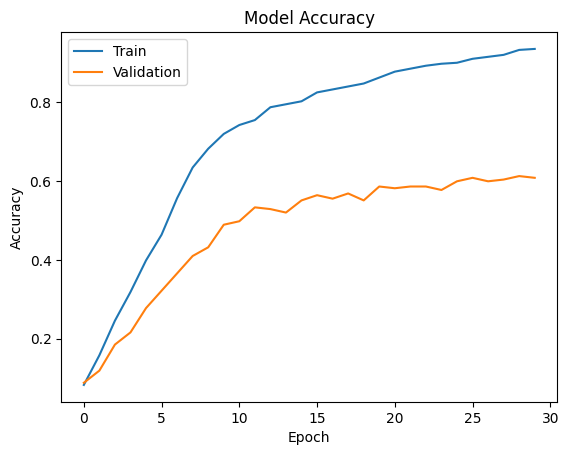

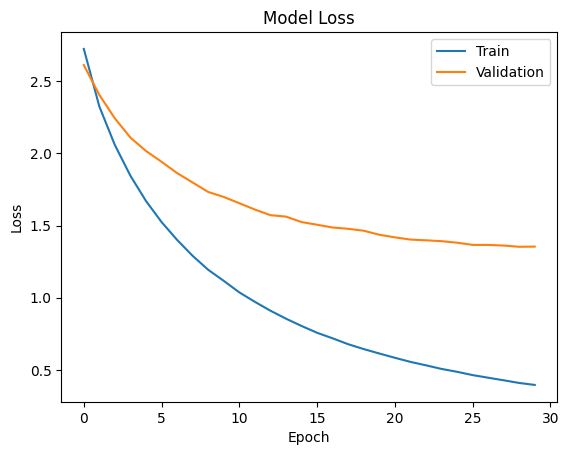

In [69]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Confusion Matrix

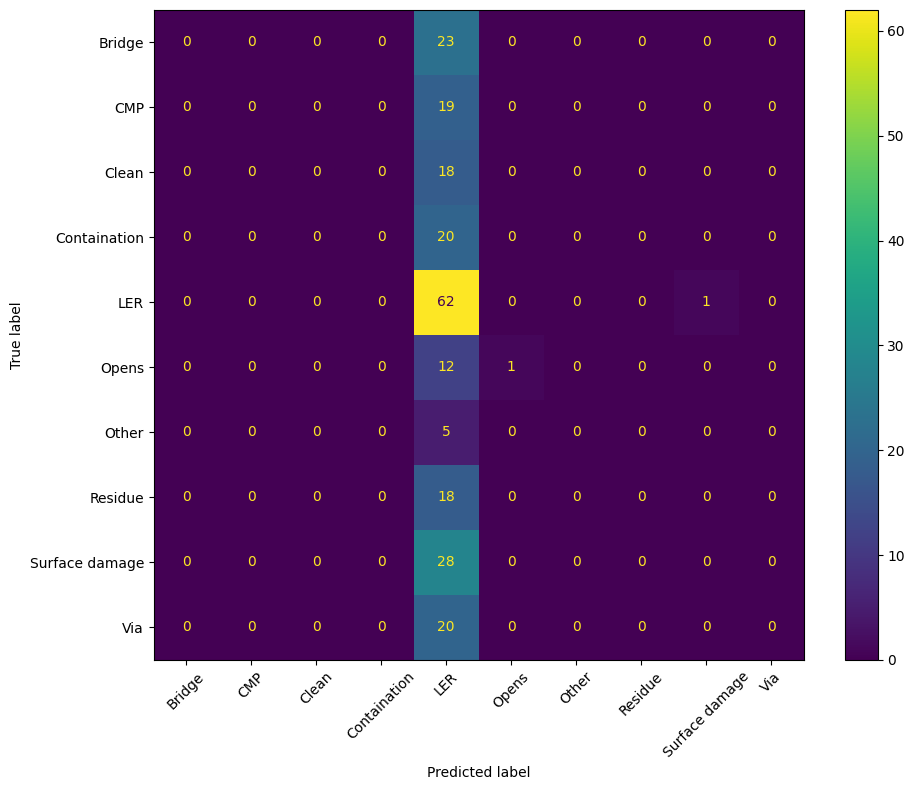

✓ Confusion matrix generated from 227 samples


In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the original trained model
original_model = tf.keras.models.load_model("wafer_defect_cnn.h5")

# Collect all validation images and labels
val_gen.reset()
all_preds = []
all_true = []

for i in range(len(val_gen)):
    try:
        images, labels = next(iter(val_gen))
        batch_preds = original_model.predict(images, verbose=0)
        all_preds.append(batch_preds)
        all_true.append(np.argmax(labels, axis=1))
    except StopIteration:
        break

# Combine all batches
preds = np.vstack(all_preds) if all_preds else np.array([])
y_pred = np.argmax(preds, axis=1)
y_true = np.hstack(all_true) if all_true else np.array([])

# Generate confusion matrix
if len(y_true) > 0 and len(y_pred) > 0:
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(cm, display_labels=sorted(val_gen.class_indices.keys()))
    disp.plot(ax=ax)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"✓ Confusion matrix generated from {len(y_true)} samples")
else:
    print("❌ No validation data available")

Precision, Recall, F1, Accuracy

In [75]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True
)

metrics_table = pd.DataFrame(report).transpose()

metrics_table




c:\Users\Claret\Documents\Jackie's files\deeptech\keras_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Claret\Documents\Jackie's files\deeptech\keras_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Claret\Documents\Jackie's files\deeptech\keras_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


,precision,recall,f1-score,support
Bridge,0.000000,0.000000,0.000000,23.000000
CMP,0.000000,0.000000,0.000000,19.000000
Clean,0.000000,0.000000,0.000000,18.000000
Containation,0.000000,0.000000,0.000000,20.000000
LER,0.275556,0.984127,0.430556,63.000000
Opens,1.000000,0.076923,0.142857,13.000000
Other,0.000000,0.000000,0.000000,5.000000
Residue,0.000000,0.000000,0.000000,18.000000
Surface damage,0.000000,0.000000,0.000000,28.000000
Via,0.000000,0.000000,0.000000,20.000000


In [76]:
metrics_clean = metrics_table.loc[class_names, ["precision", "recall", "f1-score"]]
metrics_clean


,precision,recall,f1-score
Bridge,0.000000,0.000000,0.000000
CMP,0.000000,0.000000,0.000000
Clean,0.000000,0.000000,0.000000
Containation,0.000000,0.000000,0.000000
LER,0.275556,0.984127,0.430556
Opens,1.000000,0.076923,0.142857
Other,0.000000,0.000000,0.000000
Residue,0.000000,0.000000,0.000000
Surface damage,0.000000,0.000000,0.000000
Via,0.000000,0.000000,0.000000


Confusion Matrix (table)

In [74]:
import pandas as pd
from sklearn.metrics import confusion_matrix

class_names = list(test_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

cm_table = pd.DataFrame(
    cm,
    index=[f"Actual_{c}" for c in class_names],
    columns=[f"Pred_{c}" for c in class_names]
)

cm_table


,Pred_Bridge,Pred_CMP,Pred_Clean,Pred_Containation,Pred_LER,Pred_Opens,Pred_Other,Pred_Residue,Pred_Surface damage,Pred_Via
Actual_Bridge,0,0,0,0,23,0,0,0,0,0
Actual_CMP,0,0,0,0,19,0,0,0,0,0
Actual_Clean,0,0,0,0,18,0,0,0,0,0
Actual_Containation,0,0,0,0,20,0,0,0,0,0
Actual_LER,0,0,0,0,62,0,0,0,1,0
Actual_Opens,0,0,0,0,12,1,0,0,0,0
Actual_Other,0,0,0,0,5,0,0,0,0,0
Actual_Residue,0,0,0,0,18,0,0,0,0,0
Actual_Surface damage,0,0,0,0,28,0,0,0,0,0
Actual_Via,0,0,0,0,20,0,0,0,0,0


Save the model

In [78]:
model.save("wafer_defect_cnn.h5")


check file size

In [79]:
import os

size_mb = os.path.getsize("wafer_defect_cnn.h5") / (1024 * 1024)
print(f"Model size: {size_mb:.2f} MB")


Model size: 10.87 MB


In [81]:
def representative_data_gen():
    for i in range(100):
        x, _ = next(train_gen)
        yield [x.astype(np.float32)]


Conversion to tensorflowlite

In [83]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\Claret\AppData\Local\Temp\tmp2xfymz2_\assets


INFO:tensorflow:Assets written to: C:\Users\Claret\AppData\Local\Temp\tmp2xfymz2_\assets


Saved artifact at 'C:\Users\Claret\AppData\Local\Temp\tmp2xfymz2_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='keras_tensor_678')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2171757695376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2171757697296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2171687572048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2171687573776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2171687573200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2171687573392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2171687571664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2171687571856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2171687573584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2171687572240: TensorSpec(shape=(), dtype=tf.resource, name=None)
 

c:\Users\Claret\Documents\Jackie's files\deeptech\keras_env\Lib\site-packages\tensorflow\lite\python\convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Save tf lite model

In [84]:
with open("wafer_defect_cnn_int8.tflite", "wb") as f:
    f.write(tflite_model)


Compare sizes

In [85]:
tflite_size = os.path.getsize("wafer_defect_cnn_int8.tflite") / (1024 * 1024)
print(f"TFLite INT8 model size: {tflite_size:.2f} MB")


TFLite INT8 model size: 2.74 MB


Test INT8 model inference

In [86]:
interpreter = tf.lite.Interpreter(model_path="wafer_defect_cnn_int8.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Get one validation image
img, _ = next(val_gen)
img = img[:1]

# Quantize input
scale, zero_point = input_details[0]['quantization']
img_int8 = (img / scale + zero_point).astype(np.int8)

interpreter.set_tensor(input_details[0]['index'], img_int8)
interpreter.invoke()

output = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output)

print("Predicted class index:", predicted_class)


Predicted class index: 0


c:\Users\Claret\Documents\Jackie's files\deeptech\keras_env\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Inference latency (edge-thinking)

In [87]:
import time

start = time.time()
for _ in range(50):
    interpreter.invoke()
end = time.time()

avg_time_ms = (end - start) / 50 * 1000
print(f"Average inference time: {avg_time_ms:.2f} ms")


Average inference time: 1.58 ms


In [89]:
import os

print("=" * 70)
print("MODEL EXPORT SUMMARY")
print("=" * 70)

# Check which model formats exist
formats = {
    "wafer_defect_cnn.h5": "Keras H5 Format",
    "wafer_defect_cnn_int8.tflite": "TFLite INT8 (Quantized)",
    "wafer_tf_model": "SavedModel"
}

print("\n✅ AVAILABLE MODEL FORMATS:\n")

for filepath, description in formats.items():
    if os.path.exists(filepath):
        if filepath.endswith('.h5') or filepath.endswith('.tflite'):
            size_mb = os.path.getsize(filepath) / (1024 * 1024)
            print(f"  ✓ {description}")
            print(f"    Path: {filepath}")
            print(f"    Size: {size_mb:.2f} MB\n")
        else:
            # For SavedModel directory
            if os.path.isdir(filepath):
                print(f"  ✓ {description}")
                print(f"    Path: {filepath}/\n")

print("=" * 70)
print("DEPLOYMENT RECOMMENDATIONS:")
print("=" * 70)
print("""
  🎯 For Edge/Mobile Deployment:
     → Use wafer_defect_cnn_int8.tflite
     → Smallest size, optimized for inference

  🎯 For TensorFlow Serving:
     → Use wafer_tf_model/
     → Production-ready deployment format

  🎯 For General ML Pipelines:
     → Use wafer_defect_cnn.h5
     → Compatible with most frameworks

  ℹ️  ONNX Format:
     → Not compatible due to tf2onnx limitations
     → Use SavedModel or TFLite as alternatives
""")
print("=" * 70)


MODEL EXPORT SUMMARY

✅ AVAILABLE MODEL FORMATS:

  ✓ Keras H5 Format
    Path: wafer_defect_cnn.h5
    Size: 10.87 MB

  ✓ TFLite INT8 (Quantized)
    Path: wafer_defect_cnn_int8.tflite
    Size: 2.74 MB

  ✓ SavedModel
    Path: wafer_tf_model/

DEPLOYMENT RECOMMENDATIONS:

  🎯 For Edge/Mobile Deployment:
     → Use wafer_defect_cnn_int8.tflite
     → Smallest size, optimized for inference

  🎯 For TensorFlow Serving:
     → Use wafer_tf_model/
     → Production-ready deployment format

  🎯 For General ML Pipelines:
     → Use wafer_defect_cnn.h5
     → Compatible with most frameworks

  ℹ️  ONNX Format:
     → Not compatible due to tf2onnx limitations
     → Use SavedModel or TFLite as alternatives



convert onnx to keras

In [ ]:
import os
onnx_size = os.path.getsize("wafer_defect_cnn.onnx") / (1024 * 1024)
print(f"ONNX model size: {onnx_size:.2f} MB")


In [ ]:
import onnxruntime as ort
import numpy as np

session = ort.InferenceSession("wafer_defect_cnn.onnx")
input_name = session.get_inputs()[0].name

img, _ = next(val_gen)
img = img[:1].astype(np.float32)

pred = session.run(None, {input_name: img})
print("Predicted class:", np.argmax(pred[0]))
